## Lab: Image Data Visualization

## Introduction  
Welcome to the lab session for **Image Data Visualization**.

In [42]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## 1. Digital Image Representation

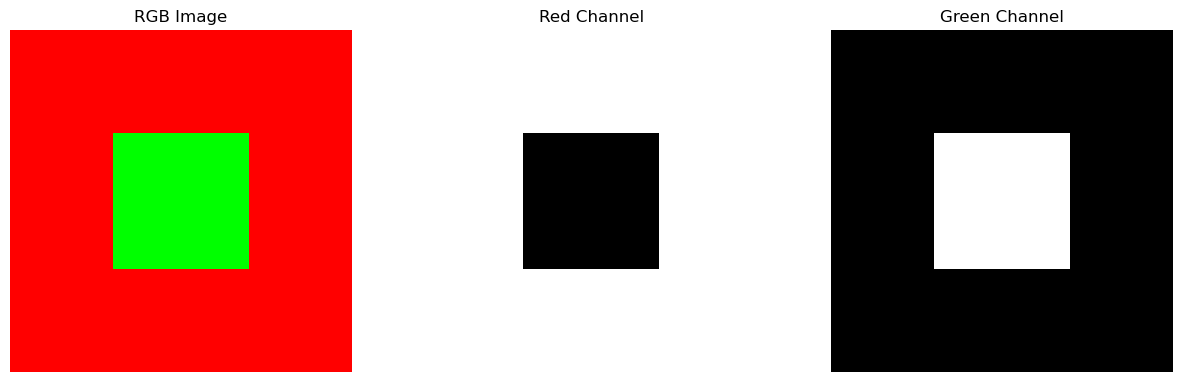

In [43]:
# simple RGB image
rgb_array = np.zeros((100, 100, 3), dtype=np.uint8)

# Create pure red background
rgb_array[:, :, 0] = 255  # Red channel
rgb_array[:, :, 1] = 0    # Green channel
rgb_array[:, :, 2] = 0    # Blue channel

rgb_array[30:70, 30:70] = [0, 255, 0]  # Set pure green (R=0, G=255, B=0)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(rgb_array)
plt.title('RGB Image')
plt.axis("off")

plt.subplot(132)
plt.imshow(rgb_array[:,:,0], cmap='gray')
plt.title('Red Channel')
plt.axis("off")

plt.subplot(133)
plt.imshow(rgb_array[:,:,1], cmap='gray')
plt.title('Green Channel')
plt.axis("off")

plt.show()

## 2. Loading Images with Different Libraries

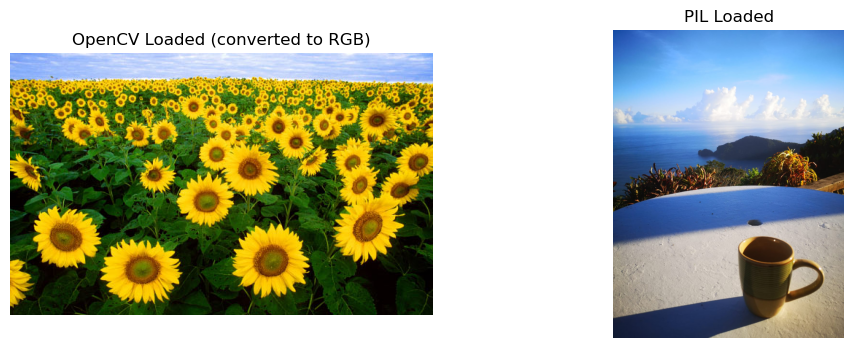

In [44]:
img_cv = cv2.imread('Sunflowers.jpg')
# Convert BGR to RGB for display
img_cv_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

img_pil = Image.open('coffee_view.jpeg')
img_pil_array = np.array(img_pil)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(img_cv_rgb)
plt.title('OpenCV Loaded (converted to RGB)')
plt.axis("Off")
plt.subplot(122)
plt.imshow(img_pil_array)
plt.title('PIL Loaded')
plt.axis("Off")
plt.show()

### **When to Use Each Library**
| Library       | Use Case                                   |
|---------------|-------------------------------------------|
| **OpenCV**    | Advanced image processing (e.g., filters, feature detection) |
| **Pillow**    | Basic image manipulation (e.g., resize, crop, format conversion) |

## 3. Color Space Conversions

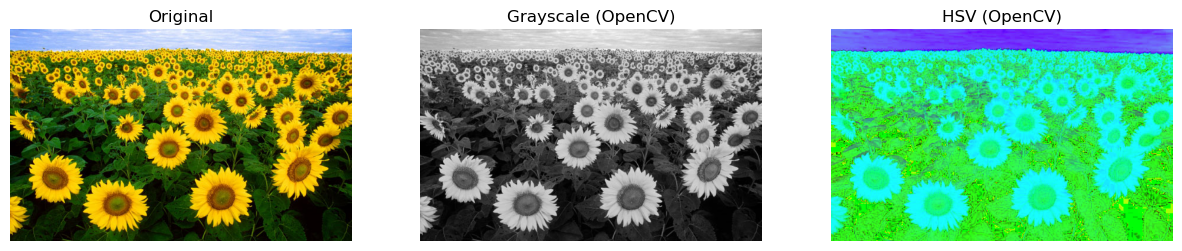

In [45]:
# OpenCV
gray_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
hsv_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)

# PIL
gray_pil = img_pil.convert('L')
gray_pil_array = np.array(gray_pil)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img_cv_rgb)
plt.title('Original')
plt.axis("OFF")
plt.subplot(132)
plt.imshow(gray_cv, cmap='gray')
plt.title('Grayscale (OpenCV)')
plt.axis("OFF")
plt.subplot(133)
plt.imshow(hsv_cv)
plt.title('HSV (OpenCV)')
plt.axis("OFF")
plt.show()

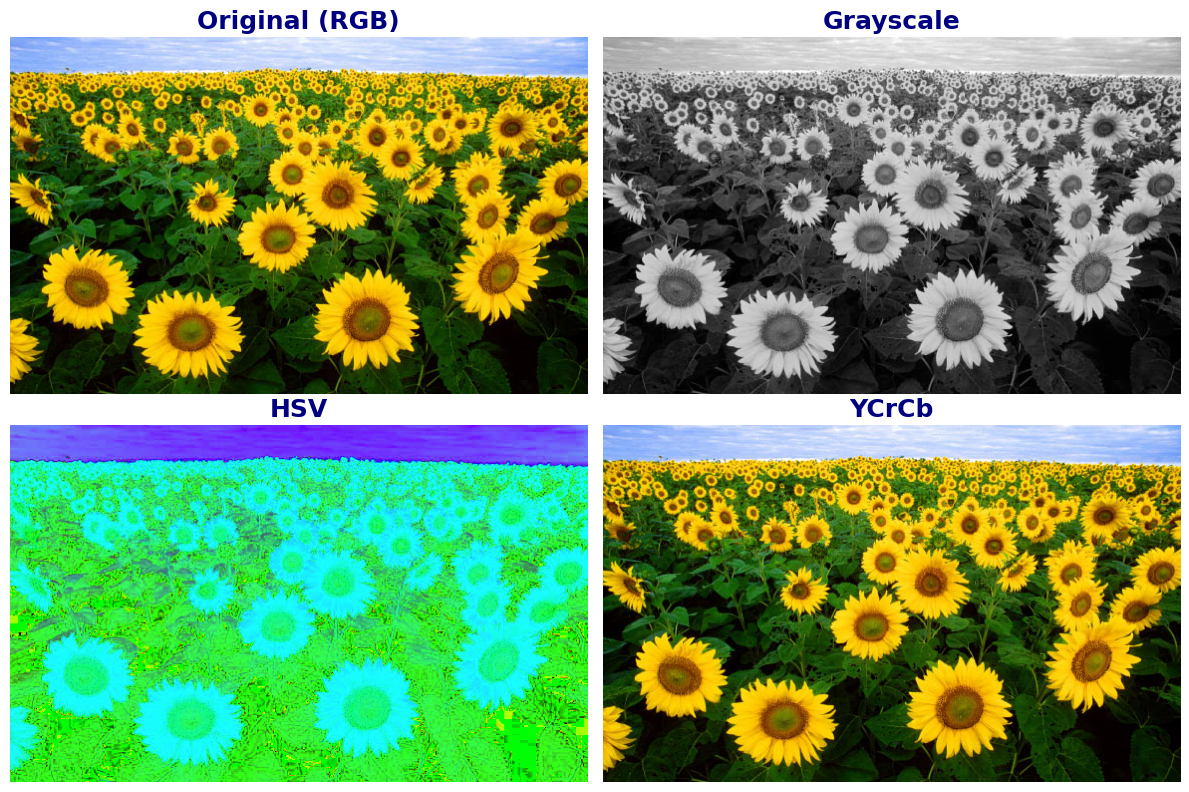

In [46]:
image = cv2.imread("Sunflowers.jpg")

# Convert the image from BGR to other color spaces
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper Matplotlib display
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
ycrcb_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Create a subplot to display the images
plt.figure(figsize=(12, 8))

# Original (in RGB for display)
plt.subplot(2, 2, 1)
plt.imshow(rgb_image)
plt.title("Original (RGB)", fontsize=18, fontweight="bold", color="navy")
plt.axis("off")

# Grayscale
plt.subplot(2, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale", fontsize=18, fontweight="bold", color="navy")
plt.axis("off")

# HSV
plt.subplot(2, 2, 3)
plt.imshow(hsv_image)
plt.title("HSV", fontsize=18, fontweight="bold", color="navy")
plt.axis("off")


# YCrCb
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(ycrcb_image, cv2.COLOR_YCrCb2RGB))  # Convert YCrCb to RGB for display
plt.title("YCrCb", fontsize=18, fontweight="bold", color="navy")
plt.axis("off")

plt.tight_layout()
plt.show()

---

## 4. Image Properties and Metadata

In [47]:
# OpenCV
height, width = img_cv.shape[:2]
print(f"OpenCV Image Shape: {img_cv.shape}")
print(f"Image Size (h×w): {height}×{width}")
print(f"Data Type: {img_cv.dtype}")

# PIL
print(f"\nPIL Image Size: {img_pil.size}")
print(f"PIL Image Mode: {img_pil.mode}")
print(f"PIL Image Info: {img_pil.info}")

OpenCV Image Shape: (359, 580, 3)
Image Size (h×w): 359×580
Data Type: uint8

PIL Image Size: (960, 1280)
PIL Image Mode: RGB
PIL Image Info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1), 'progressive': 1, 'progression': 1}


## 5. Basic Transformations

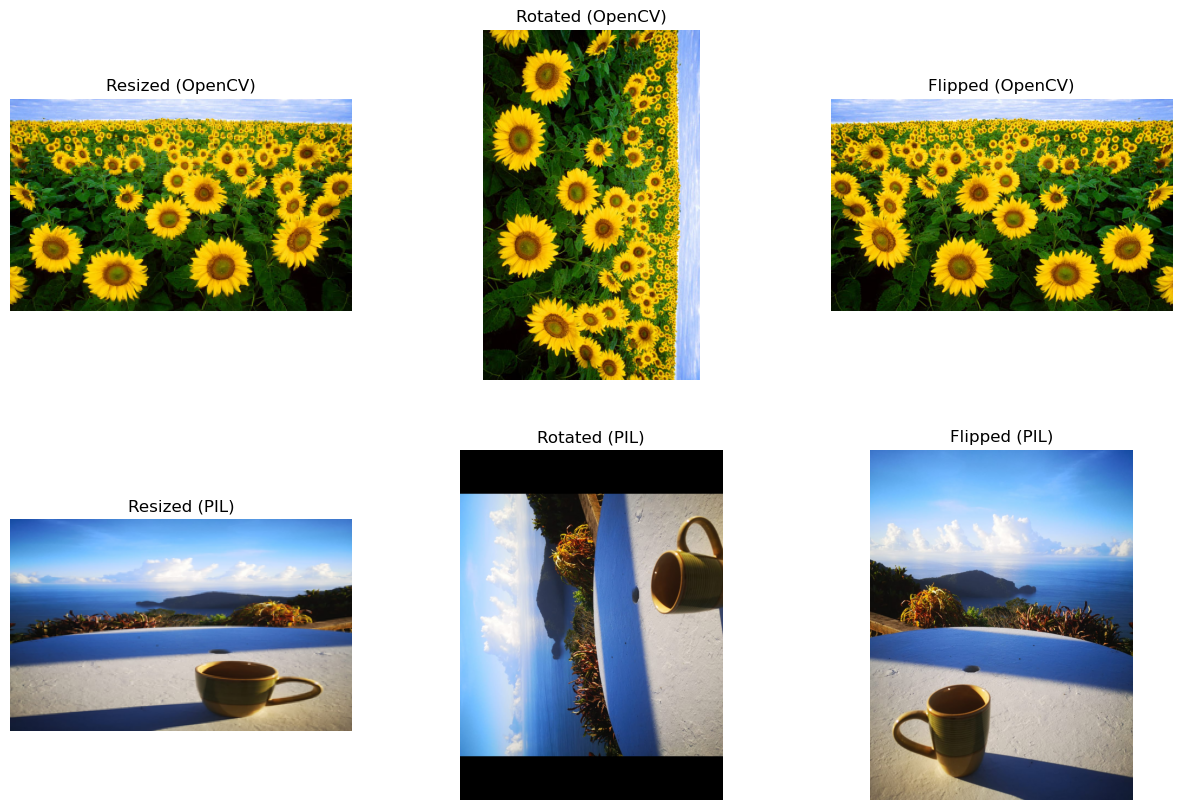

In [48]:
# OpenCV 
resized_cv = cv2.resize(img_cv, (width//2, height//2))
rotated_cv = cv2.rotate(img_cv, cv2.ROTATE_90_CLOCKWISE)
flipped_cv = cv2.flip(img_cv, 1)  # 1 for horizontal flip

# PIL
resized_pil = img_pil.resize((width//2, height//2))
rotated_pil = img_pil.rotate(90)
flipped_pil = img_pil.transpose(Image.FLIP_LEFT_RIGHT)

plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.imshow(cv2.cvtColor(resized_cv, cv2.COLOR_BGR2RGB))
plt.title('Resized (OpenCV)')
plt.axis("OFF")

plt.subplot(232)
plt.imshow(cv2.cvtColor(rotated_cv, cv2.COLOR_BGR2RGB))
plt.title('Rotated (OpenCV)')
plt.axis("OFF")

plt.subplot(233)
plt.imshow(cv2.cvtColor(flipped_cv, cv2.COLOR_BGR2RGB))
plt.title('Flipped (OpenCV)')
plt.axis("OFF")

plt.subplot(234)
plt.imshow(resized_pil)
plt.title('Resized (PIL)')
plt.axis("OFF")

plt.subplot(235)
plt.imshow(rotated_pil)
plt.title('Rotated (PIL)')
plt.axis("OFF")

plt.subplot(236)
plt.imshow(flipped_pil)
plt.title('Flipped (PIL)')
plt.axis("OFF")
plt.show()

## 6. Binary Image Creation

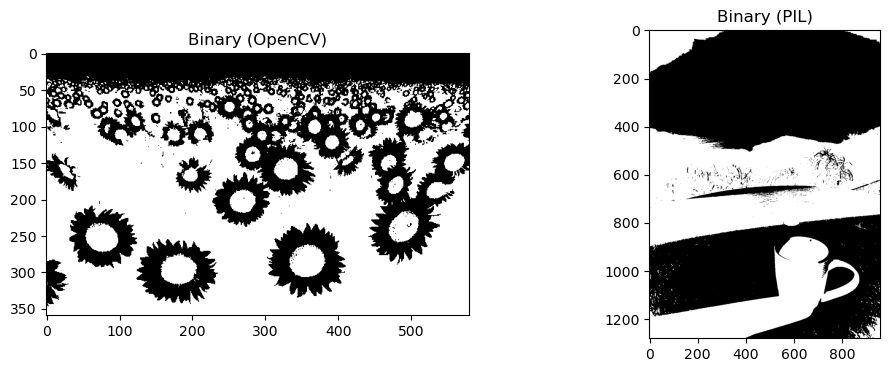

In [49]:
# using OpenCV
_, binary_cv = cv2.threshold(gray_cv, 127, 255, cv2.THRESH_BINARY)

# using PIL
binary_pil = gray_pil.point(lambda x: 0 if x < 127 else 255, '1')
binary_pil_array = np.array(binary_pil)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(binary_cv, cmap='binary')
plt.title('Binary (OpenCV)')
plt.subplot(122)
plt.imshow(binary_pil_array, cmap='binary')
plt.title('Binary (PIL)')
plt.show()

---

## 7. Advanced Image Visualization

### Histograms and Color Distribution

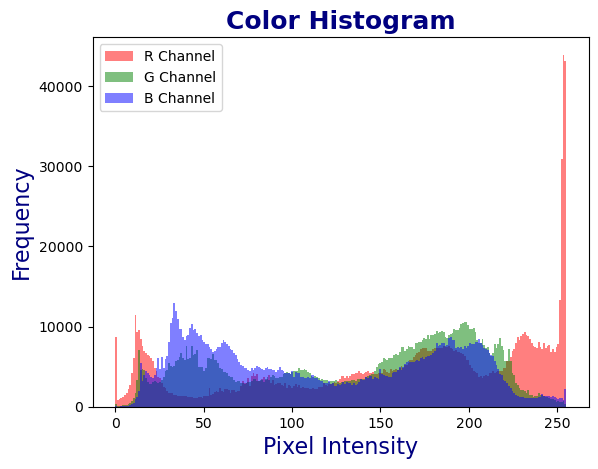

In [50]:
image = cv2.imread('coffee_view.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Generate histograms for RGB channels
colors = ['r', 'g', 'b']
for i, color in enumerate(colors):
    channel = image[:, :, i]
    plt.hist(channel.ravel(), bins=256, color=color, alpha=0.5, label=f'{color.upper()} Channel')

plt.title('Color Histogram', fontweight="bold", fontsize=18, color="navy")
plt.xlabel('Pixel Intensity', fontsize=16, color="navy")
plt.ylabel('Frequency', fontsize=16, color="navy")
plt.legend()
plt.show()

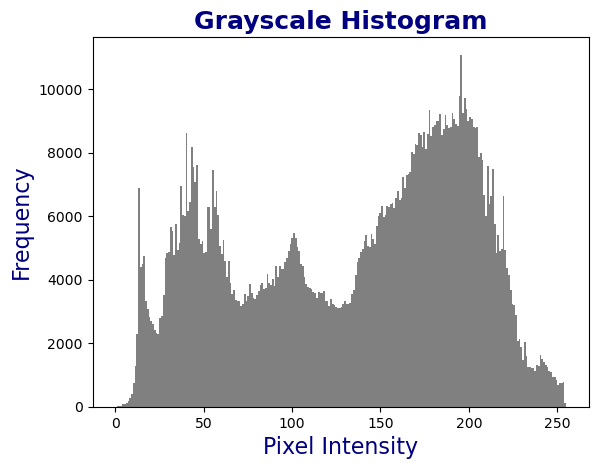

In [51]:
# Grayscale histogram
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.hist(image_gray.ravel(), bins=256, color='gray')
plt.title('Grayscale Histogram', fontweight = "bold", fontsize=18, color="navy")
plt.xlabel('Pixel Intensity', fontsize=16, color="navy")
plt.ylabel('Frequency', fontsize=16, color="navy")
plt.show()

---

## 8. Image Enhancements Techniques

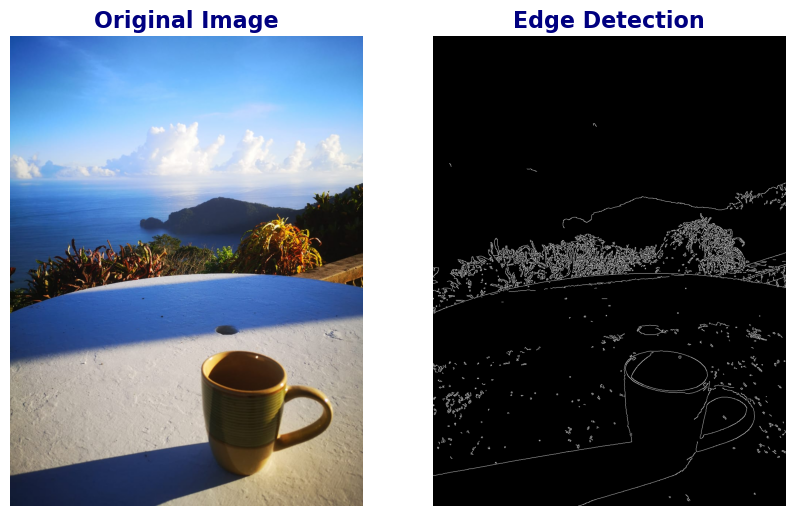

In [54]:
# Apply Gaussian Blur (Smoothing)
smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny Edge Detection
edges = cv2.Canny(image, 100, 200)

# Display original and processed images
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image', fontsize = 16, color="navy", fontweight="bold")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection', fontsize = 16, color="navy", fontweight="bold")
plt.axis('off')
plt.show()

---

## 9. Multi-image Visualizations

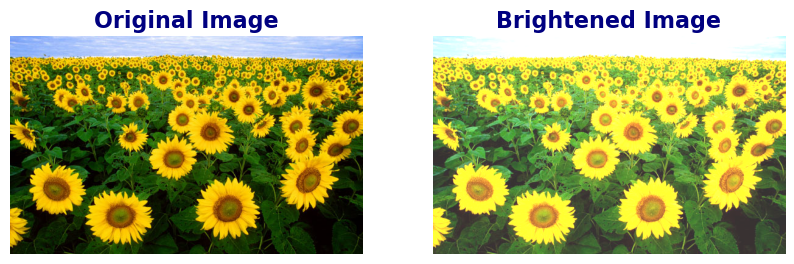

In [55]:
image = cv2.imread('Sunflowers.jpg')

# Apply Brightness Enhancement
alpha = 1.2  # Contrast control (1.0-3.0)
beta = 50    # Brightness control (0-100)
bright_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image', fontweight="bold", fontsize=16, color="navy")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(bright_image, cv2.COLOR_BGR2RGB))
plt.title('Brightened Image', fontweight="bold", fontsize=16, color="navy")
plt.axis("off")

plt.show()

---

### Channel Separation

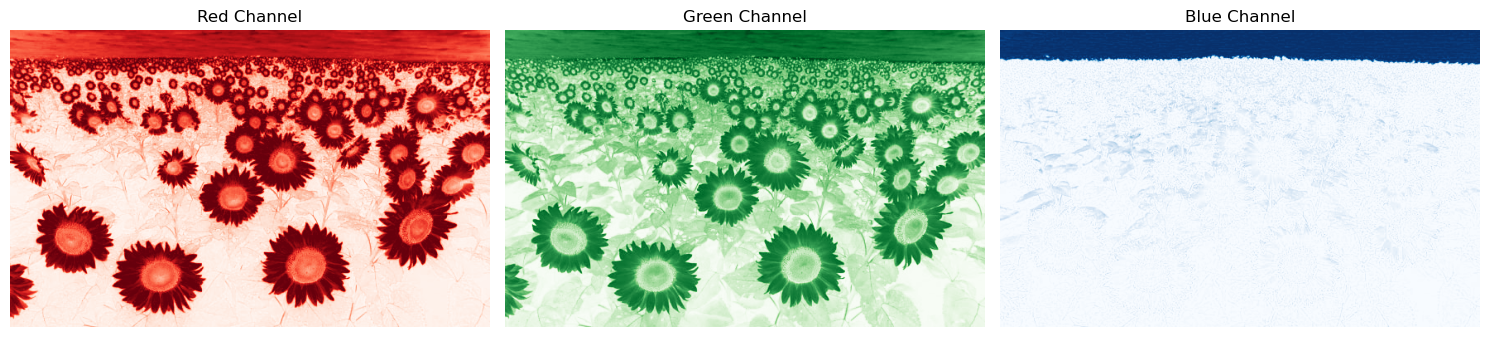

In [56]:
# Split the image into its RGB channels
plt.figure(figsize=(15, 5))

# Red Channel
plt.subplot(1, 3, 1)
plt.imshow(rgb_image[:,:,0], cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

# Green Channel
plt.subplot(1, 3, 2)
plt.imshow(rgb_image[:,:,1], cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

# Blue Channel
plt.subplot(1, 3, 3)
plt.imshow(rgb_image[:,:,2], cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

---

## 10. Practical Applications

### Visualizing Image Classification Results
- The **MNIST dataset** and a pre-trained simple classifier from `sklearn` are used.

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


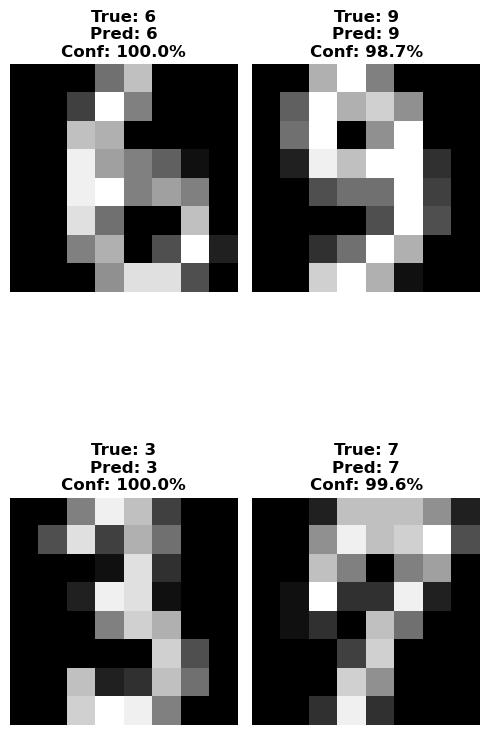

In [27]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the MNIST dataset (digits)
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)

predictions = model.predict(X_test)
confidence_scores = model.predict_proba(X_test).max(axis=1)

# Visualize 4 test images with predictions
plt.figure(figsize=(5, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {predictions[i]}\nConf: {confidence_scores[i]*100:.1f}%", fontsize=12, fontweight="bold")
    plt.axis("off")
plt.tight_layout()
plt.show()

### Visualizing Object Detection Results
- A pre-trained **YOLOv5 nano model** for object detection is used. 
- Install YOLOv5 via pip install `ultralytics`.

PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.


0: 640x640 1 tv, 1 laptop, 1 book, 240.8ms
Speed: 14.9ms preprocess, 240.8ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


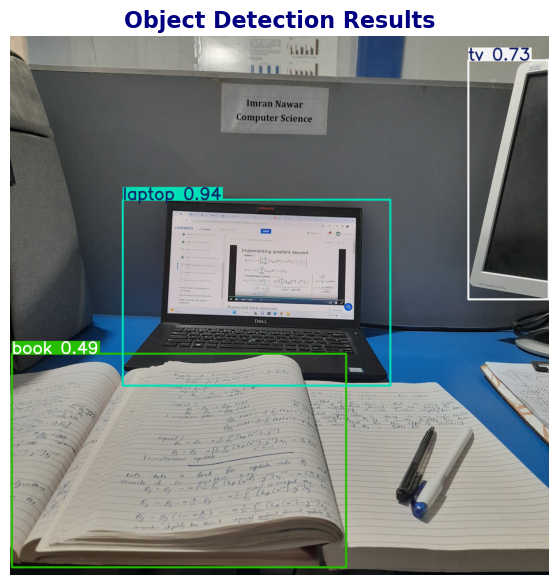

In [36]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load pre-trained YOLOv5n model
model = YOLO('yolov5n.pt')

image_path = 'study_slot.jpg'
image = cv2.imread(image_path)

# Perform object detection
results = model(image)

# Visualize results on the image
annotated_image = results[0].plot()

plt.figure(figsize=(10, 7))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title("Object Detection Results", fontweight="bold", fontsize=16, color="navy")
plt.axis("off")
plt.show()

### Visualizing Segmentation Results  
- Use the CamVid dataset with a pre-trained segmentation model (segformer_b0). Install torchvision for dataset loading and Hugging Face's transformers for the model.

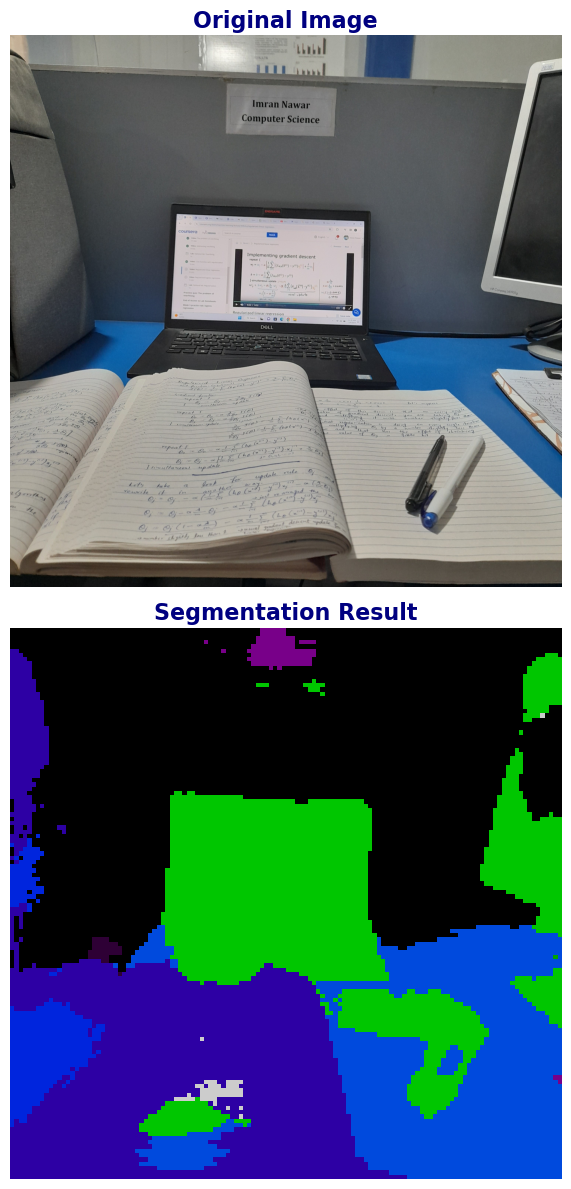

In [41]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import matplotlib.pyplot as plt

# Load a pre-trained SegFormer model
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")


image_path = 'study_slot.jpg'
image = Image.open(image_path)

# Preprocess image
inputs = feature_extractor(images=image, return_tensors="pt")

# Perform segmentation
outputs = model(**inputs)
logits = outputs.logits
segmentation = logits.argmax(dim=1)[0].numpy()


plt.figure(figsize=(8, 12))
plt.subplot(2, 1, 1)
plt.imshow(image)
plt.title("Original Image", fontweight="bold", color="navy", fontsize=16)
plt.axis("off")

plt.subplot(2, 1, 2)
plt.imshow(segmentation, cmap="nipy_spectral")
plt.title("Segmentation Result", fontweight="bold", fontsize=16, color="navy")
plt.axis("off")

plt.tight_layout()
plt.show()

### Visualizing Real-time Image Processing

In [57]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Apply real-time edge detection
    edges = cv2.Canny(frame, 100, 200)

    # Display original and processed video side by side
    combined = cv2.hconcat([frame, cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)])
    cv2.imshow("Real-Time Processing", combined)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

---

## **Thank You**